Transmission and Reflection Simulation. Can adjust between the two by changing the kleft and kright variables.

1D Classical Wave Equation

$$
\frac{\partial^2\xi(x,t)}{\partial t^2} = v^2 \frac{\partial^2\xi(x,t)}{\partial x^2}
$$


In this simulation we can replace the second derivative with the spacially discretized version: $(\xi_{i+1} - 2\xi_i + \xi_{i-1})$

In this simulation we will set $v^2 = \frac{ka^2}{m}$ because we are essentially modeling a many coupled oscillator system. Here, $a$ is the distance between oscillators, which goes to zero as the contiuum limit is taken.



In [46]:
import numpy as np
import matplotlib.pyplot as plt

#variables for matrix
kleft = 5
kright = 1
m = 1
num_osc = 201 #number of oscillators used to simulate wave

#stiffness matrix setup
diag_left = 2*kleft * np.ones(int((num_osc-1)/2))
diag_center = (kleft + kright) * np.ones(1)
diag_right = 2*kright * np.ones(int((num_osc-1)/2))

off_diag_left = kleft * np.ones(int((num_osc-1)/2))
off_diag_right = kright * np.ones(int((num_osc-1)/2))

main_diag = np.concatenate((diag_left, diag_center, diag_right))
off_diag = np.concatenate((off_diag_left, off_diag_right))

stiffness = 1/m * (np.diag(main_diag) + np.diag(-off_diag,-1) + np.diag(-off_diag,1))
#Sets up a matrix such that as the wave travels across, at the center point the stiffness coefficient k will change causes transmission effects
print(stiffness)

[[10. -5.  0. ...  0.  0.  0.]
 [-5. 10. -5. ...  0.  0.  0.]
 [ 0. -5. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [ 0.  0.  0. ...  0. -1.  2.]]


Initial condition of the travelling gaussian wave
$$
\xi(x,t) = A e^{-(x-x_0-vt)^2/\sigma^2}.
$$

In [48]:
#Initial conditions
A = 1
a = 0.1
x0 = 2.5
sigma = 0.5

v = np.sqrt(((kleft+kright)*a**2)/m)
osc_pos = a * np.arange(0,num_osc,1) #oscillator position, x axis variable name essentially

t_max = 150
dt = 0.01
t_values = np.arange(0,t_max,dt)

disp = np.zeros((num_osc, len(t_values)))
vel = np.zeros((num_osc, len(t_values)))
acc = np.zeros((num_osc, len(t_values)))

disp[:,0] = A * np.exp((-(osc_pos-x0)**2)/(sigma**2)) #When t=0

vel[:,0] = (2*A*v*(osc_pos-x0))/(sigma**2)*np.exp((-(osc_pos-x0)**2)/(sigma**2))

In [49]:
#Euler-Cromer time evolution method
for i in range(len(t_values)-1):
  acc[:,i] = -stiffness @ disp[:,i]
  vel[:,i+1] = vel[:,i] + acc[:,i]*dt
  disp[:,i+1] = disp[:,i] + vel[:,i+1]*dt #note the next velocity value is used to calculate displacement, not the current

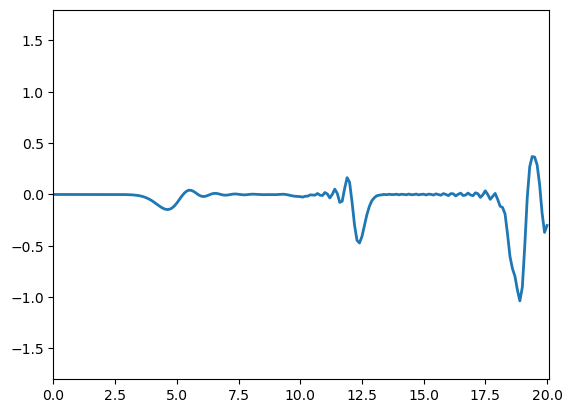

In [50]:
#video of wave make sure to install ffmpeg using pip install ffmpeg-python in terminal
from matplotlib import animation
from IPython.display import HTML

x_max = a*num_osc

y_max = 1.8 

fig = plt.figure()
ax = plt.axes(xlim=(0, x_max), ylim=(-y_max, y_max))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(osc_pos, disp[:,i])
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                              frames=range(0,int(t_max/dt),int(1/dt)), interval=100, blit=True)

HTML(anim.to_html5_video())